In [1]:
#라이브러리 불러오기
from tensorflow.keras.utils import load_img 
from tensorflow.keras.utils import img_to_array 
from keras.applications.vgg16 import preprocess_input 

from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from collections import Counter

In [2]:
#저장된 이미지 썸네일 리스트로 불러오기
path = r"/Users/jungy/Downloads/먹방"
os.chdir(path)
mukbang = []
with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.jpg'):
            mukbang.append(file.name) 
print(mukbang)

['먹방0.jpg', '먹방1.jpg', '먹방10.jpg', '먹방100.jpg', '먹방101.jpg', '먹방102.jpg', '먹방103.jpg', '먹방104.jpg', '먹방105.jpg', '먹방106.jpg', '먹방107.jpg', '먹방108.jpg', '먹방109.jpg', '먹방11.jpg', '먹방110.jpg', '먹방111.jpg', '먹방112.jpg', '먹방113.jpg', '먹방114.jpg', '먹방115.jpg', '먹방116.jpg', '먹방117.jpg', '먹방118.jpg', '먹방119.jpg', '먹방12.jpg', '먹방120.jpg', '먹방121.jpg', '먹방122.jpg', '먹방123.jpg', '먹방124.jpg', '먹방125.jpg', '먹방126.jpg', '먹방127.jpg', '먹방128.jpg', '먹방129.jpg', '먹방13.jpg', '먹방130.jpg', '먹방131.jpg', '먹방132.jpg', '먹방133.jpg', '먹방134.jpg', '먹방135.jpg', '먹방136.jpg', '먹방137.jpg', '먹방138.jpg', '먹방139.jpg', '먹방14.jpg', '먹방140.jpg', '먹방141.jpg', '먹방142.jpg', '먹방143.jpg', '먹방144.jpg', '먹방145.jpg', '먹방146.jpg', '먹방147.jpg', '먹방148.jpg', '먹방149.jpg', '먹방15.jpg', '먹방150.jpg', '먹방151.jpg', '먹방152.jpg', '먹방153.jpg', '먹방154.jpg', '먹방155.jpg', '먹방156.jpg', '먹방157.jpg', '먹방158.jpg', '먹방159.jpg', '먹방16.jpg', '먹방160.jpg', '먹방161.jpg', '먹방162.jpg', '먹방163.jpg', '먹방164.jpg', '먹방165.jpg', '먹방166.jpg', '먹방167.jpg', '먹방168.jp

In [3]:
#VGG16 모델 불러오기(OUTPUT)
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

#이미지 특징 추출 함수 정의
def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img) 
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [4]:
#이미지 배열화
img_list=[]
for img in mukbang:
    image=load_img(img, target_size=(224,224))
    image_np = np.array(image) 
    img_list.append(image_np)
img_np=np.array(img_list)

In [5]:
#VGG16 모델 출력
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
data = {}
p = r"/Users/jungy/Downloads/먹방"

#이미지 특징 추출
for img in mukbang:
    try:
        feat = extract_features(img,model)
        data[img] = feat
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

            
filenames= np.array(list(data.keys()))
feat = np.array(list(data.values()))
print(feat.shape)

feat = feat.reshape(-1,4096)
print(feat.shape)


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 164ms/step
(442, 1, 4096)
(442, 4096)


In [7]:
#PCA를 통한 차원 축소
pca = PCA(n_components=2, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [8]:
#Kmeans를 활용한 clustering
kmeans = KMeans(n_clusters=3,random_state=22)
kmeans.fit(x)

C:\Users\jungy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=22)

In [9]:
print("km.labels_", kmeans.labels_)
print("km.labels_.shape", kmeans.labels_.shape)

km.labels_ [0 0 0 2 0 1 2 2 2 2 0 2 2 0 1 0 2 0 1 2 2 2 2 2 0 2 2 2 2 1 0 2 2 2 1 2 2
 1 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 0 2 1 1 2 2 1
 1 2 2 2 2 0 1 2 1 1 2 1 1 1 2 2 0 0 0 1 1 2 0 1 2 2 2 2 2 2 2 2 0 1 2 1 2
 2 0 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 0 0 2 1 1 2 0 2 2 0 0 2 2
 2 2 1 0 1 0 1 1 2 2 2 0 2 1 2 0 2 2 1 2 2 1 1 1 1 2 2 2 2 2 2 2 0 2 2 0 0
 2 2 2 2 2 2 2 1 1 2 2 2 1 1 2 1 2 0 1 1 1 2 1 1 2 1 2 0 1 2 2 0 1 1 1 1 1
 0 0 0 0 0 2 1 2 0 1 0 2 1 2 1 1 2 1 1 0 2 2 2 1 2 0 0 1 2 1 0 1 2 1 0 2 1
 1 0 1 2 2 2 0 2 1 2 2 1 1 0 2 2 2 2 2 2 2 1 2 2 1 0 1 1 2 1 2 2 1 0 2 2 1
 1 1 1 2 0 1 0 2 2 2 2 2 2 0 1 0 2 2 2 1 2 1 0 1 2 2 2 2 2 1 1 2 2 2 1 0 2
 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 0 2 2 2 2 0 2 0 0 2 2 2 0 0 2 1 0 0 1 1 2 2
 1 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 1 2
 0 2 2 2 2 2 2 2 2 2 2 1 2 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
km.labels_.shape (442,)


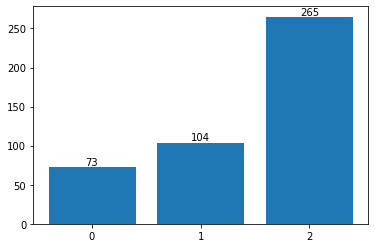

In [10]:
#Kmeans 군집별 데이터 수 시각화
label=kmeans.labels_.tolist()
total=Counter(label)
keys=total.keys()
values=total.values()
bar=plt.bar(keys,values)
plt.xticks([0,1,2])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.f' % height, ha='center', va='bottom', size = 10)
plt.show()

In [11]:
#배열로 저장된 이미지 사진으로 출력하는 함수 정의
def draw_sample_data(arr, ratio=1):
    n = len(arr) 
    print(n)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols * ratio, rows * ratio), squeeze=False)
    for i in range(rows):
        print(i)
        for j in range(cols):
            if i * 10 + j < n:
                print(i)
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

73
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7


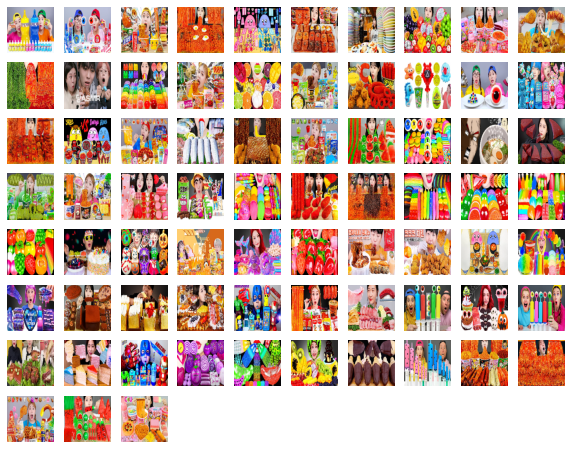

104
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10


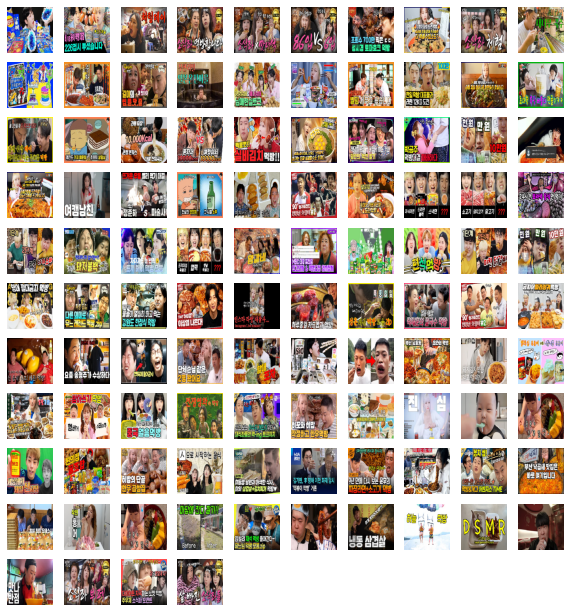

265
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26


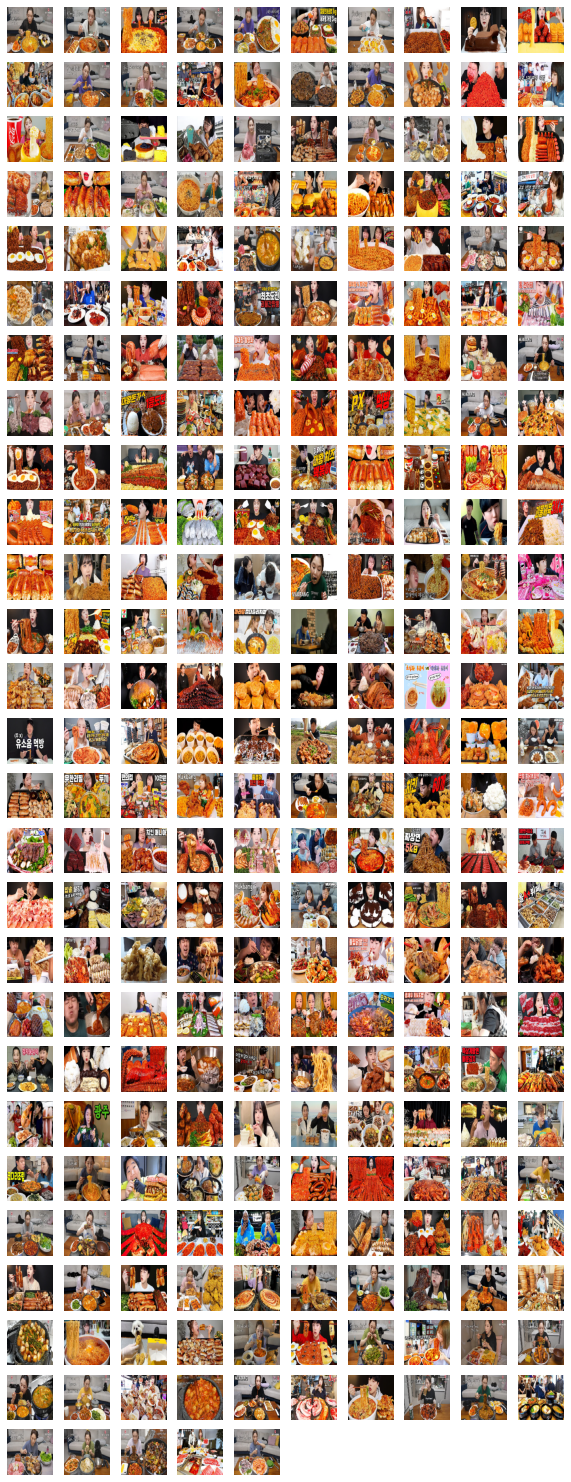

In [56]:
draw_sample_data(img_np[kmeans.labels_ == 0])
draw_sample_data(img_np[kmeans.labels_ == 1])
draw_sample_data(img_np[kmeans.labels_ == 2])